In [30]:
import os
import numpy as np
from tqdm import tqdm
import librosa
import matplotlib.pyplot as plt

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
genres_labels = []
selected_songs = []

for genre in genres:
    genre_folder = f'./genres/{genre}'
    # 获取目录下的文件列表
    files = os.listdir(genre_folder)
    if files:  # 确保文件列表不为空
        filename = files[0]  # 选择每个流派文件夹中的第一个文件
        song_path = os.path.join(genre_folder, filename)
        try:
            y, sr = librosa.load(song_path, mono=True, duration=30)
            genres_labels.append(genre)
            selected_songs.append(song_path)  # 保存选中歌曲的路径
        except Exception as e:
            print(f"Error processing {song_path}: {e}")
            continue  # 如果处理歌曲时出现错误，打印错误并继续到下一个流派



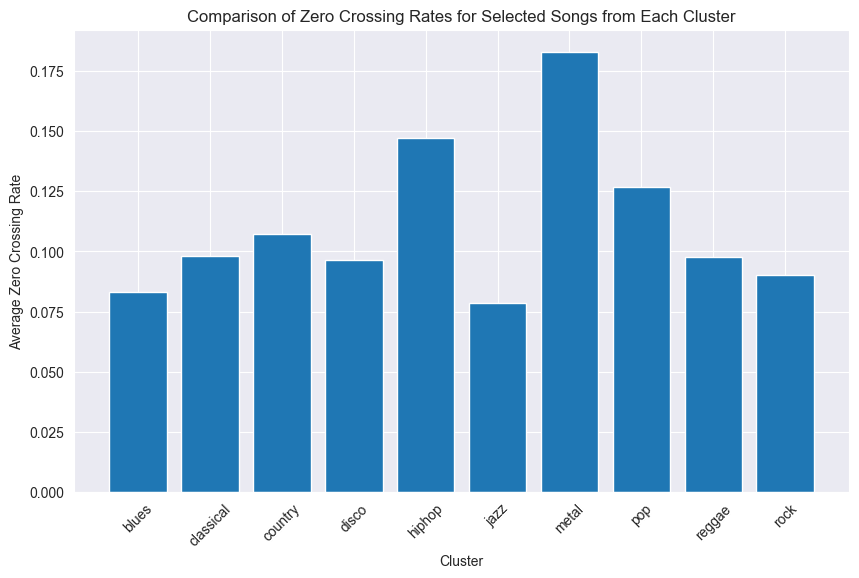

In [31]:
zcrs = []  # 用于存储过零率
for song in selected_songs:
    y, sr = librosa.load(song, duration=30)
    zcr = librosa.feature.zero_crossing_rate(y)
    zcrs.append(np.mean(zcr))
    
# 可视化
plt.figure(figsize=(10, 6))
plt.bar(range(len(zcrs)), zcrs, tick_label=[genres_labels[i] for i in range(10)])
plt.xlabel('Cluster')
plt.ylabel('Average Zero Crossing Rate')
plt.title('Comparison of Zero Crossing Rates for Selected Songs from Each Cluster')
plt.xticks(rotation=45)
plt.show()


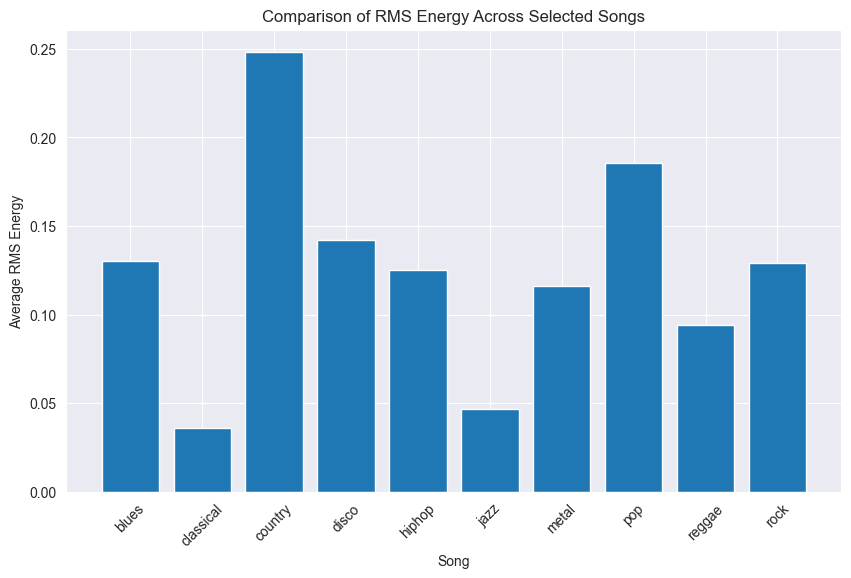

In [32]:
rms_values = []
for song_path in selected_songs:
    y, sr = librosa.load(song_path, mono=True, duration=30)
    rms = librosa.feature.rms(y=y)
    rms_values.append(np.mean(rms))

# 可视化 RMS
plt.figure(figsize=(10, 6))
plt.bar(range(len(rms_values)), rms_values, tick_label=[genres_labels[i] for i in range(len(rms_values))])
plt.xlabel('Song')
plt.ylabel('Average RMS Energy')
plt.title('Comparison of RMS Energy Across Selected Songs')
plt.xticks(rotation=45)
plt.show()

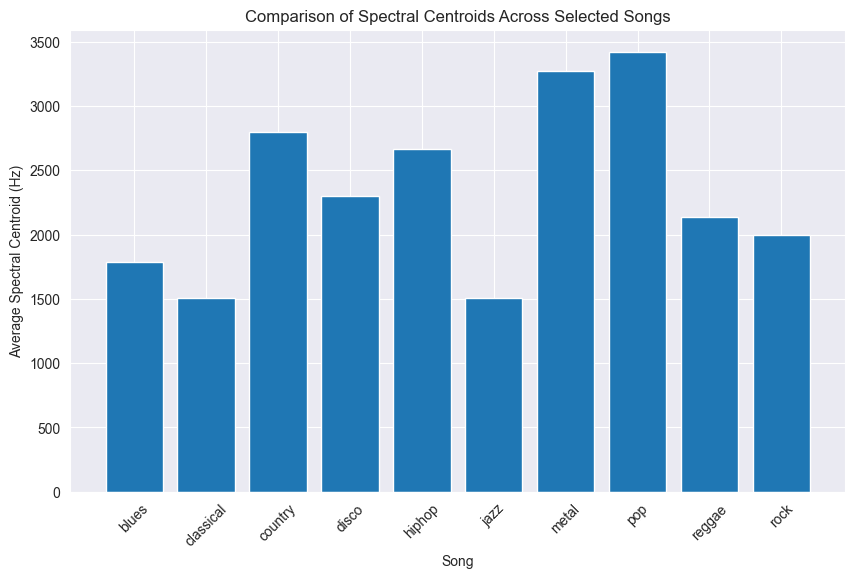

In [33]:
# 假设 selected_songs 是选定的歌曲路径列表
spectral_centroids_values = []

for song_path in selected_songs:
    y, sr = librosa.load(song_path, mono=True, duration=30)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroids_values.append(np.mean(spectral_centroids))

# 可视化频谱质心
plt.figure(figsize=(10, 6))
plt.bar(range(len(spectral_centroids_values)), spectral_centroids_values, tick_label=[genres_labels[i] for i in range(len(spectral_centroids_values))])
plt.xlabel('Song')
plt.ylabel('Average Spectral Centroid (Hz)')
plt.title('Comparison of Spectral Centroids Across Selected Songs')
plt.xticks(rotation=45)
plt.show()